<a href="https://colab.research.google.com/github/Harishpatil0172/M5-Forecasting-Kaggle/blob/main/01_M5_Forecasting_kaggle_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement :

1. Can you estimate, as precisely as possible, the point forecasts of the unit sales of various products sold in the USA by Walmart for the next 28 days?

2. How much camping gear will one store sell each month in a year?

# Overview:

The data, covers stores in three US States (**California**, **Texas**, and **Wisconsin**) and includes item level, department, product categories, and store details.

In addition, it has explanatory variables such as price, promotions, day of the week, and special events.

The sales information reaches back from Jan 2011 to June 2016

The data comprises 3049 individual products from 3 categories (Foods, Hobbies, and Household) and 7 departments, sold in 10 stores (4 in CA and 3 each in TX and WI) in 3 states


### Connecting Kaggle:


In [1]:
# install Kaggle
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harish0172","key":"5e499f0af63b87a1f02652ce00c0f01b"}'}

In [3]:
# Create Kaggle Folder

! mkdir ~/.kaggle

In [4]:
# Copy the Kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [5]:
# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Dataset from kaggle
! kaggle competitions download -c "m5-forecasting-accuracy"

 70% 32.0M/45.8M [00:00<00:00, 184MB/s] 
100% 45.8M/45.8M [00:00<00:00, 199MB/s]


In [7]:
# Unzip
! unzip m5-forecasting-accuracy.zip

Archive:  m5-forecasting-accuracy.zip
  inflating: calendar.csv            
  inflating: sales_train_evaluation.csv  
  inflating: sales_train_validation.csv  
  inflating: sample_submission.csv   
  inflating: sell_prices.csv         


### Import All Libraries:

In [119]:
#Importing all Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pyarrow.feather as feather
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
from shapely.geometry import Point,Polygon
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from shapely import wkt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

## All Datasets:

In [13]:
# calendar = pd.read_csv('/content/calendar.csv')
# sales_train_validation = pd.read_csv('/content/sales_train_validation.csv')
# sample_submission = pd.read_csv('/content/sample_submission.csv')
# sell_prices = pd.read_csv('/content/sell_prices.csv')
# sales_train_evaluation = pd.read_csv('/content/sales_train_evaluation.csv')

In [ ]:
# pip install pyarrow
# pip install fastparquet

In [148]:
calendar = pd.read_csv('calendar.csv')
sales_train_validation = pd.read_csv('/content/sales_train_validation.csv')
sample_submission = pd.read_csv('/content/sample_submission.csv')
sell_prices = pd.read_csv('/content/sell_prices.csv')
sales_train_evaluation = pd.read_csv('/content/sales_train_evaluation.csv')

In [145]:
calendar.to_feather('/content/drive/MyDrive/m5-forecasting/calendar.feather')

# sales_train_validation('/content/drive/MyDrive/m5-forecasting/sales_train_validation.feather')
# sample_submission('/content/drive/MyDrive/m5-forecasting/sample_submission.feather')
# sell_prices('/content/drive/MyDrive/m5-forecasting/sell_prices.feather')
# sales_train_evaluation('/content/drive/MyDrive/m5-forecasting/sales_train_evaluation.feather')

In [135]:
import pyarrow.feather as feather

In [146]:
calendar_feather = feather.read_feather('/content/drive/MyDrive/m5-forecasting/calendar.feather')

In [147]:
calendar_feather.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,None,None,None,None,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,None,None,None,None,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,None,None,None,None,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,None,None,None,None,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,None,None,None,None,1,0,1


In [22]:
# Casting the Columns into their respective Data types
calendar['date']=pd.to_datetime(calendar['date'])

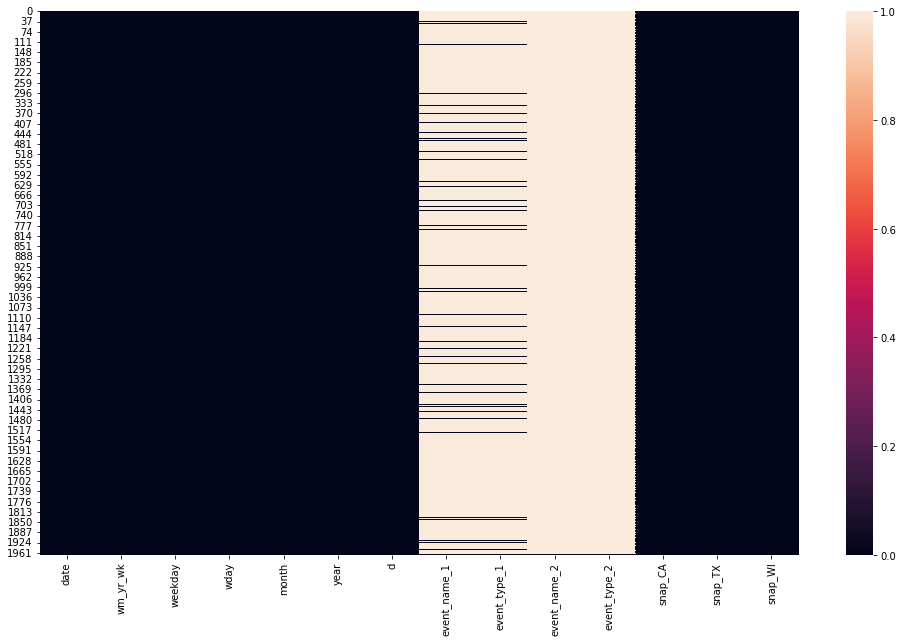

In [15]:
#Visualization of Null values using Heatmap
plt.figure(figsize=(17,10))
sns.heatmap(calendar.isnull())

In [31]:
calendar.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [34]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


# **EDA**

#### plot

Target looks like classification
Showing only top 10 of 1908 continuous features
Linear Discriminant Analysis training set score: 0.447


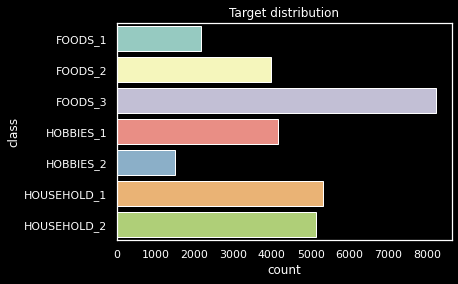

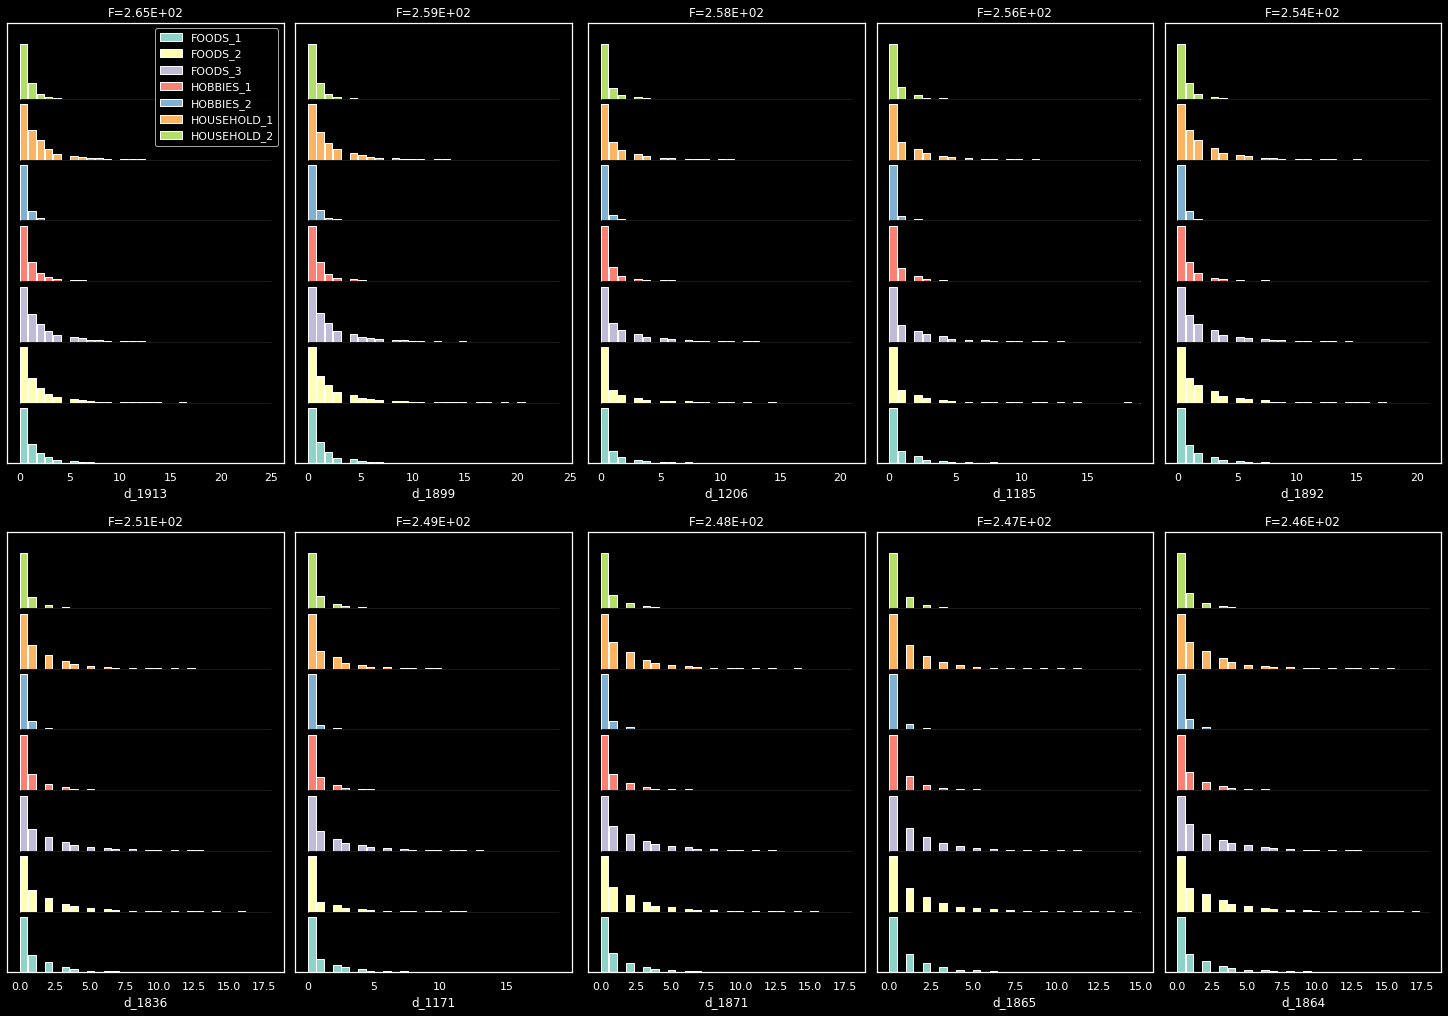

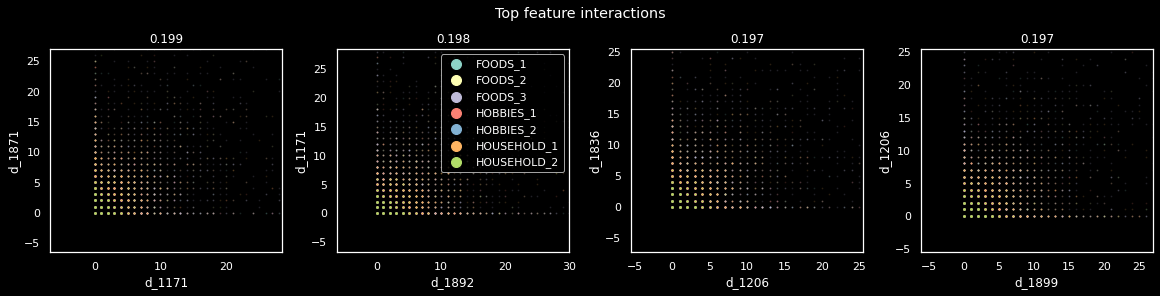

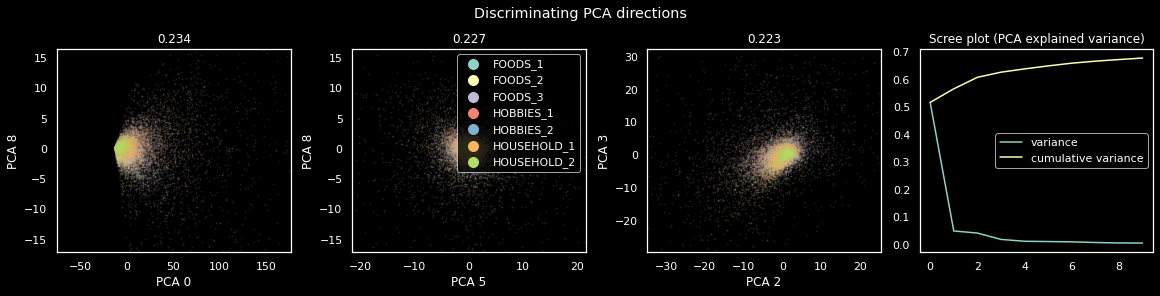

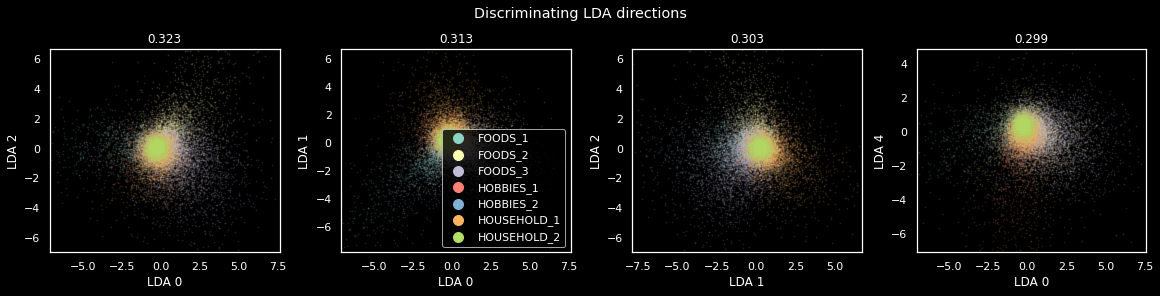

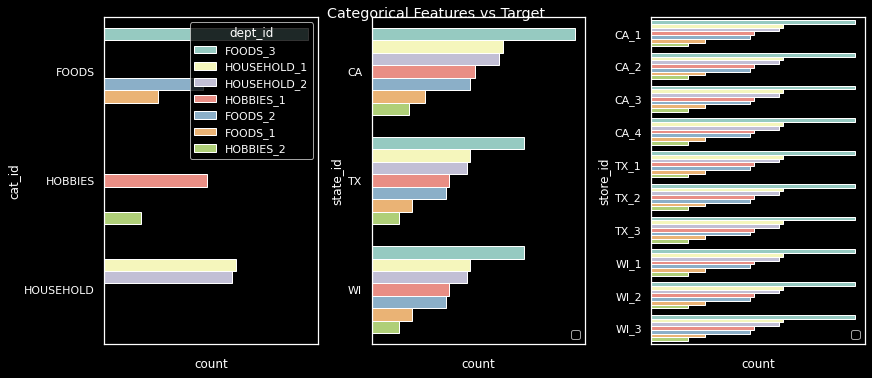

In [44]:
from dabl import plot

plot(sales_train_validation, 'dept_id')
plt.show()

Target looks like classification
Showing only top 10 of 1908 continuous features
Linear Discriminant Analysis training set score: 0.539


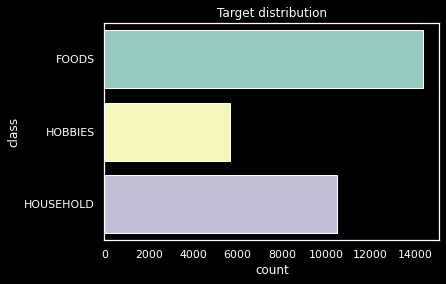

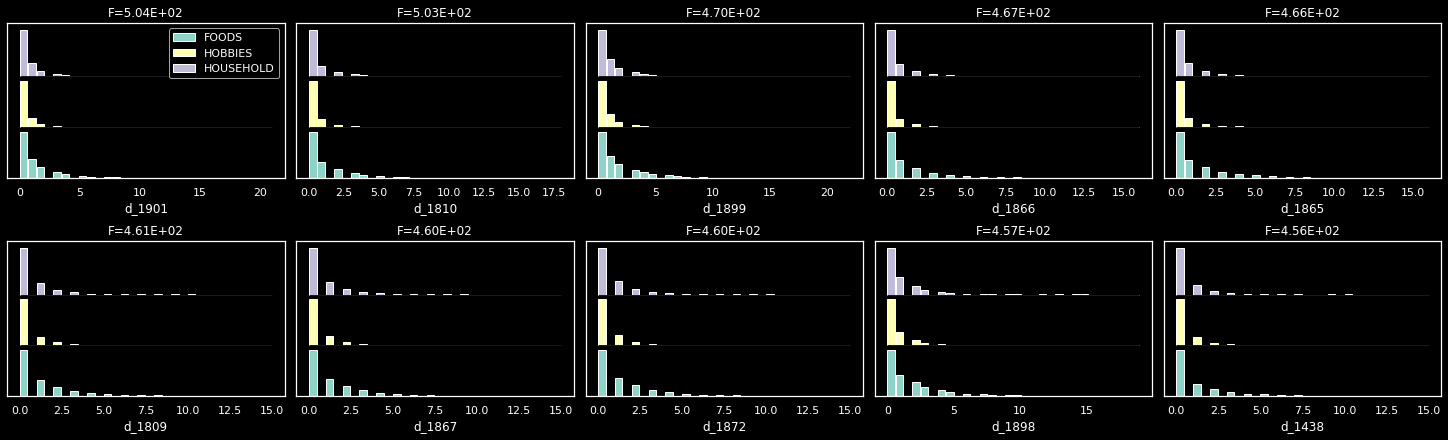

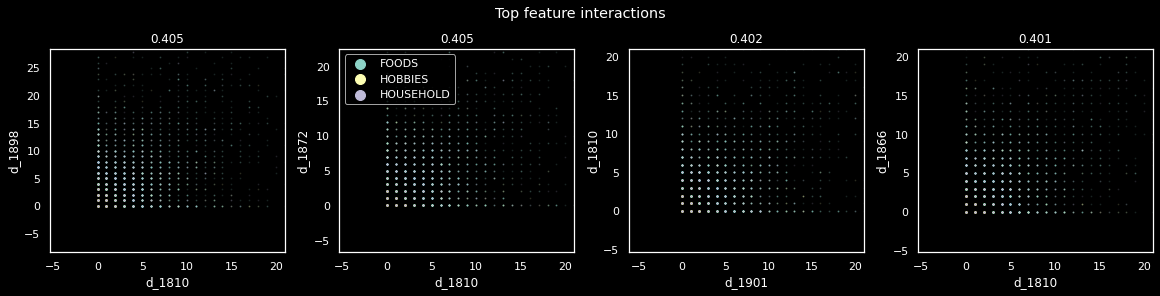

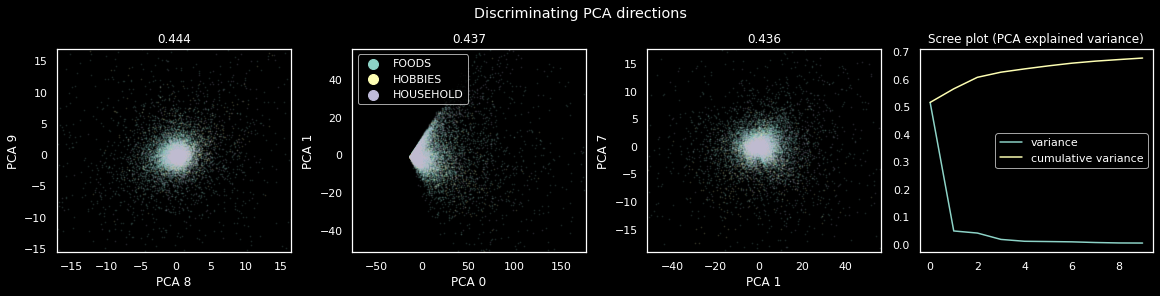

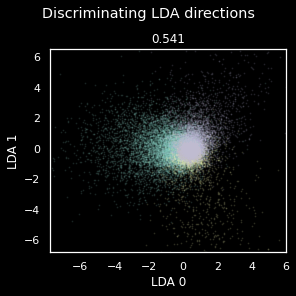

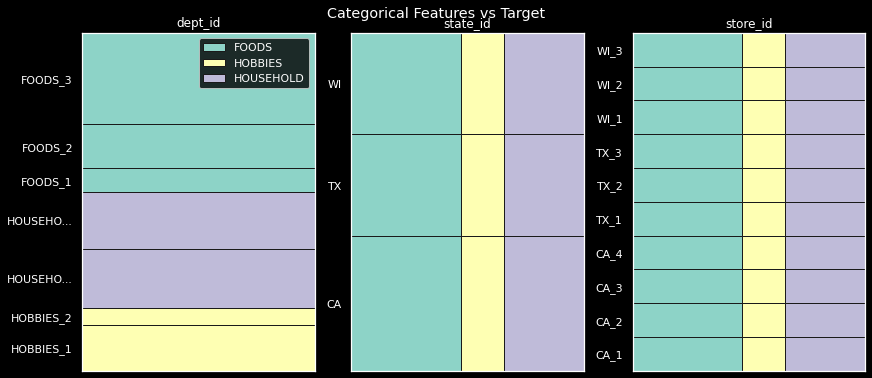

In [46]:
from dabl import plot

plot(sales_train_validation, 'cat_id')
plt.show()

this says that in our dataset we have 7types of dept_id they are

FOODS_1


FOODS_2


FOODS_3


HOBBIES_1


HOBBIES_2


HOUSEHOLD_1


HOUSEHOLD_2

### **insights**

#### **1. Check sales w.r.t. days**

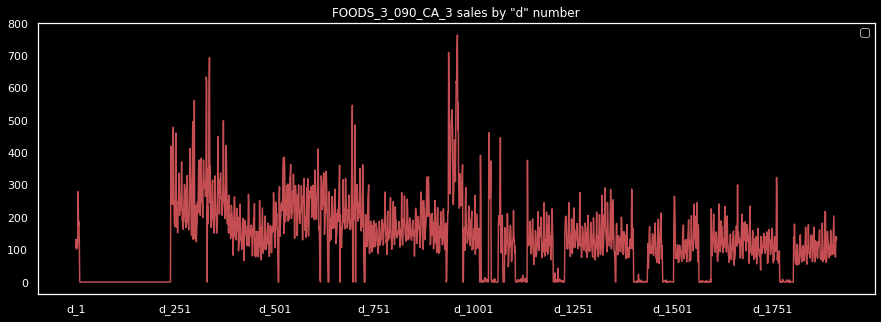

In [76]:
d_cols = [c for c in sales_train_validation.columns if 'd_' in c]

sales_train_validation.loc[sales_train_validation['id'] == 'FOODS_3_090_CA_3_validation'] \
    .set_index('id')[d_cols] \
    .T \
    .plot(figsize=(15, 5),
          title='FOODS_3_090_CA_3 sales by "d" number',
          color=('r'))
plt.legend('')
plt.show()

from above figure we can analyse that the sales quantity is zero, which indicates that a certain product may not be available on that day

We can clearly see that the sales data is very volatile. Sometimes, the sales are zero for a few days in a row, and at other times, it remains at its peak value for a few days.

#### **2. What is the average sales of stores in 3 states (CA, TX, WI) ?**

In [61]:
past_sales = sales_train_evaluation.set_index('id')[d_cols] \
    .T \
    .merge(calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

store_list = sales_train_evaluation['store_id'].unique()
means = []
fig = go.Figure()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    data = past_sales[store_items].sum(axis=1).rolling(90).mean()
    means.append(np.mean(past_sales[store_items].sum(axis=1)))
    fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Average Sales vs. Time (per store)")

In the above graph, I have plotted sales across all stores in the dataset. Almost every sales curve has "linear oscillation" trend at the macroscopic level. Basically, the sales oscillate like a sine wave about a certain mean value, but this mean value has an upward linear trend. This implies that the sales are oscillating at a higher and higher level every few months.

here economies of the stores have short-term oscillatory fluctuations but grow linearly in the long run

In [62]:
df = pd.DataFrame(np.transpose([means, store_list]))
df.columns = ["Mean sales", "Store name"]
px.bar(df, y="Mean sales", x="Store name", color="Store name", title="Mean sales vs. Store name")

From the above graph, we can see the same trends: Californian stores have the highest variance and mean among all the stores in the dataset.

#### **3. Average sales of California.**

In [63]:
store_list = sell_prices['store_id'].unique()
fig = go.Figure()
means = []
stores = []
for i, s in enumerate(store_list):
    if "ca" in s or "CA" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        means.append(np.mean(past_sales[store_items].sum(axis=1)))
        stores.append(s)
        fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Average Sales vs. Time (California)")

In the above graph, we can see the large disparity in sales among Californian stores. The sales curves almost never intersect each other. The average sales in descending order are CA_3, CA_1, CA_2, CA_4. The store CA_3 has the maximum sales while the store CA_4 has the minimum sales.

#### **4. Average sales of Wisconsin.**

In [65]:
past_sales = sales_train_evaluation.set_index('id')[d_cols] \
    .T \
    .merge(calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')


store_list = sell_prices['store_id'].unique()
fig = go.Figure()
means = []
stores = []
for i, s in enumerate(store_list):
    if "wi" in s or "WI" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        means.append(np.mean(past_sales[store_items].sum(axis=1)))
        stores.append(s)
        fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Average Sales vs. Time (Wisconsin)")

In the above graph, we can see a very low disparity in sales among Wisconsin stores. The sales curves intersect each other very often. This may indicate that most parts of Wisconsin have a similar "development curve" and that there is a greater equity in development across the state. 

The average sales in descending order are WI_2, WI_3, WI_1. The store WI_2 has the maximum sales while the store WI_1 has the minimum sales.

#### **5. Average sales of Texas**

In [66]:
store_list = sell_prices['store_id'].unique()
fig = go.Figure()
means = []
stores = []
for i, s in enumerate(store_list):
    if "tx" in s or "TX" in s:
        store_items = [c for c in past_sales.columns if s in c]
        data = past_sales[store_items].sum(axis=1).rolling(90).mean()
        means.append(np.mean(past_sales[store_items].sum(axis=1)))
        stores.append(s)
        fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s))
    
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Average Sales vs. Time (Texas)")

In the above graph, we can once again see that a very low disparity in sales among Texan stores. The sales curves intersect each other often. This might once again indicate that most parts of Texas have a similar "development curve" and that there is a greater equity in development across the state. The variance here is higher than in Wisconsin though, so there might be "hubs" of development in Texas as well, but not as pronounced as in California. 

The average sales in descending order are TX_2, TX_3, TX_1. The store TX_2 has the maximum sales while the store TX_1 has the minimum sales.

#### **6. Average sales per Department**

In [73]:
past_sales = sales_train_evaluation.set_index('id')[d_cols] \
    .T \
    .merge(calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')



store_list = sales_train_validation['dept_id'].unique()
means = []
fig = go.Figure()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    data = past_sales[store_items].sum(axis=1).rolling(90).mean()
    means.append(np.mean(past_sales[store_items].sum(axis=1)))
    fig.add_trace(go.Scatter(x=np.arange(len(data)), y=data, name=s))
fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title="Average Sales vs. Time (per dept)")

In [77]:
df = pd.DataFrame(np.transpose([means, store_list]))
df.columns = ["Mean sales", "dept name"]
px.bar(df, y="Mean sales", x="dept name", color="dept name", title="Mean sales vs. dept name")

It shows the Foods_3 category has max number of sales and Hobbies_2 has least number of sales 

In [104]:
first_date = "d_1"
last_date = "d_1913"

In [107]:
df_prices_stats = sell_prices.loc[:,["item_id", "sell_price"]]
df_prices_stats = df_prices_stats.groupby("item_id").sell_price.agg([min, max, "mean"])
df_estados = sell_prices.loc[:,"state_id":last_date]
# df_estados = df_estados.groupby("state_id").sum()
# df_estados_Q = pd.DataFrame(df_estados.sum(axis=1))

KeyError: ignored

In [83]:
fig = px.choropleth(locations=df_estados_Q.index, locationmode="USA-states", color="r", scope="usa")
fig.show()

#fig = px.bar(df_estados_Q, x= df_estados_Q.index, y = df_estados_Q.iloc[:,0], color = df_estados_Q.index)
#fig.show()

NameError: ignored